In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Args

In [2]:
EXP = "exp5"
PLATFORM = "IONTORRENT"

In [3]:
TEST = "no_adapters"

In [4]:
FIG_DIR = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/plots/exp3/cutadapt_annotations/%s/" %TEST

# Distribution of reads if trimmed by quality and length

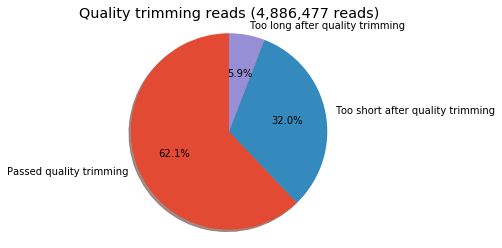

In [4]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
title = "Quality trimming reads (4,886,477 reads)"
labels = 'Passed quality trimming', 'Too short after quality trimming', 'Too long after quality trimming'
sizes = [3035311,1564667,286499]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(title)

plt.savefig(FIG_DIR + "_".join(title.split()) + ".png") 
plt.show()

# Distribution of reads annotated with building blocks

In [5]:
FILE = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_MHC_" + PLATFORM + "/reports/cutadapt_oligo_search/headers/oligo_annotated_headers.uniq_count.lst"
#FILE = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp5_MHC_IONTORRENT/reports/cutadapt_oligo_search/headers/oligo_annotated_headers.uniq_count.lst"

In [6]:
head_df = pd.read_csv(FILE, sep=" ", names=("counts", "tso", "b_primer", "anneal", "cd8_primer", "mhc_primer"))

In [7]:
head_df.head()

,counts,tso,b_primer,anneal,cd8_primer,mhc_primer
0,253,no_adapter,no_adapter,ANNEAL,no_adapter,no_adapter
1,2008,no_adapter,no_adapter,ANNEAL,no_adapter,PRIMER_MHC
2,335,no_adapter,no_adapter,ANNEAL,PRIMER_CD8,no_adapter
3,4,no_adapter,no_adapter,ANNEAL,PRIMER_CD8,PRIMER_MHC
4,169169,no_adapter,no_adapter,no_adapter,no_adapter,no_adapter


In [8]:
head_df['a_primer'] = np.where(head_df.cd8_primer == 'no_adapter', head_df.mhc_primer, head_df.cd8_primer)
head_df.replace('no_adapter', np.NaN, inplace=True)
head_df.a_primer = head_df.a_primer.str.slice_replace(start=7, repl='A')
head_df['match'] = head_df.loc[:, ['tso', 'b_primer', 'anneal', 'a_primer']].count(axis=1)

In [9]:
head_df.replace(np.NaN, '', inplace=True)
head_df['name'] = head_df.tso + " " + head_df.b_primer + " " + head_df.anneal + " " + head_df.a_primer
head_df.loc[head_df.match == 0, 'name'] = "no adapter"

In [10]:
head_df

,counts,tso,b_primer,anneal,cd8_primer,mhc_primer,a_primer,match,name
0,253,,,ANNEAL,,,,1,ANNEAL
1,2008,,,ANNEAL,,PRIMER_MHC,PRIMER_A,2,ANNEAL PRIMER_A
2,335,,,ANNEAL,PRIMER_CD8,,PRIMER_A,2,ANNEAL PRIMER_A
3,4,,,ANNEAL,PRIMER_CD8,PRIMER_MHC,PRIMER_A,2,ANNEAL PRIMER_A
4,169169,,,,,,,0,no adapter
5,166542,,,,,PRIMER_MHC,PRIMER_A,1,PRIMER_A
6,2474,,,,PRIMER_CD8,,PRIMER_A,1,PRIMER_A
7,417,,,,PRIMER_CD8,PRIMER_MHC,PRIMER_A,1,PRIMER_A
8,6,,PRIMER_B,ANNEAL,,,,2,PRIMER_B ANNEAL
9,61,,PRIMER_B,ANNEAL,,PRIMER_MHC,PRIMER_A,3,PRIMER_B ANNEAL PRIMER_A


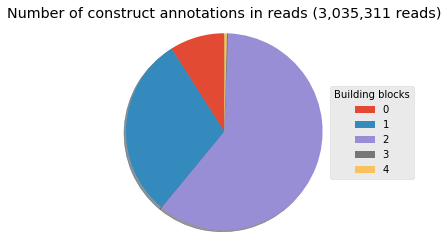

[169169, 563089, 1131942, 3344, 8168]


In [11]:
title = "Number of construct annotations in reads (3,035,311 reads)"
total_sizes = list()
for i in range(5):
    total_sizes.append(head_df[head_df.match == i].counts.sum())
    
labels = list(range(5))

fig1, ax1 = plt.subplots()
wedges, text = ax1.pie(total_sizes, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(title)

ax1.legend(wedges, labels,
          title="Building blocks",
          loc="center left",
          bbox_to_anchor=(0.8, 0, 0.5, 1))

#plt.savefig(FIG_DIR + "_".join(title.split()) + ".png", bbox_inches='tight') 
plt.show()

print(total_sizes)


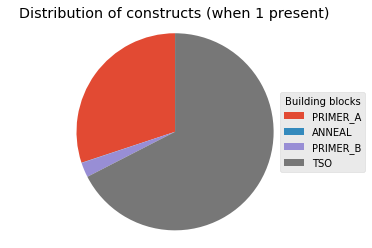

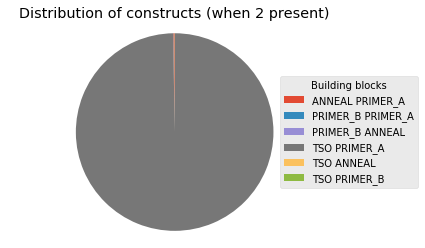

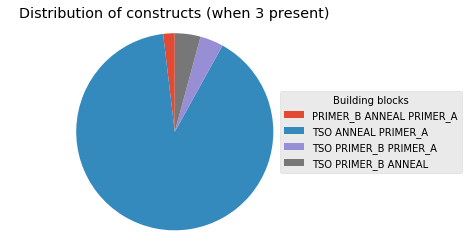

In [12]:

for i in range(1,4):
    title = "Distribution of constructs (when %i present)" %i
    sizes = head_df[head_df.match == i].groupby('name')['counts'].sum().to_list()
    labels = [" ".join(j.strip().split()) for j in head_df[head_df.match == i].groupby('name')['counts'].sum().index]
    fig1, ax1 = plt.subplots()
    wedges, text = ax1.pie(sizes, shadow=False, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)

    ax1.legend(wedges, labels,
              title="Building blocks",
              loc="center left",
              bbox_to_anchor=(0.8, 0, 0.5, 1))

    #plt.savefig(FIG_DIR + "_".join(title.split()) + ".png", bbox_inches='tight') 
    plt.show()

# Distribution of number of reads per GEM

In [5]:
FILE = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/cutadapt_naming/%s/headers/annotated_headers.lst" %TEST

In [9]:
head_df = pd.read_csv(FILE, sep=" ", usecols=[0,1], names=('read_id', 'gem'))

In [10]:
head_df.head()

,read_id,gem
0,HBBAF:00961:02096,BX:Z:AAACCTGAGCTTTCAG-1
1,HBBAF:00735:00634,BX:Z:AAACCTGAGTATTGGA-1
2,HBBAF:00010:00452,BX:Z:AAACCTGAGTGAAGTT-1
3,HBBAF:00327:02439,BX:Z:AAACCTGAGTGAAGTT-1
4,HBBAF:00765:02333,BX:Z:AAACCTGAGTGAAGTT-1


In [23]:
counts = head_df.groupby(['gem'])['read_id'].count().values

Text(0.5, 1.0, 'Distribution of GEMs with different counts of reads')

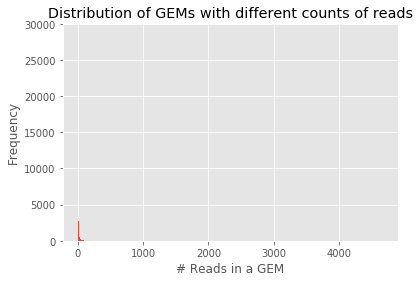

In [36]:
title = "Distribution of GEMs with different counts of reads"

plt.hist(counts, bins=range(1, max(counts)+2))
plt.xlabel("# Reads in a GEM")
plt.ylabel("Frequency")
plt.title(title)